                * Karim Mohamed Farahat                     201801904
                * Abdullah Kamal Muhammad                   201801271
                * Mohamed Ahmed                             201800760


In [ ]:
!pip install pyedflib
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from pyedflib import EdfReader
from scipy import signal
import matplotlib.pyplot as plt
import mne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset:

####The CHB-MIT(Children’s Hospital Boston-Massachusetts Institute of Technology) dataset, is a dataset of EEG recordings from pediatric subjects with intractable seizures. Subjects were monitored for up to several days following withdrawal of anti-seizure mediation in order to characterize their seizures and assess their candidacy for surgical intervention. The dataset contains 23 patients divided among 24 cases (a patient has 2 recordings, 1.5 years apart). The dataset consists of 969 Hours of scalp EEG recordings with 173 seizures. There exist various types of seizures in the dataset (clonic, atonic, tonic). The diversity of patients (Male, Female, 10-22 years old) and different types of seizures contained in the datasets are ideal for assessing the performance of automatic seizure detection methods in realistic settings.


In [ ]:
def readEdfFile(pathToFile):
    f = EdfReader(pathToFile)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    signal_labels.append('seizure')
    sigbufs = np.zeros((f.getNSamples()[0],n+1))
    for i in np.arange(n): sigbufs[:,i] = f.readSignal(i)
    sigbufs[:, n]= 0.0
    df =  pd.DataFrame(data = sigbufs, columns = signal_labels)
    f._close()
    return df

### Read the EDF files to import the EEG signals into a pandas dataframe 
### it considers the channel names as its feature names
### thh output to be returned is the pandas data fram that contains the signals captured by the channels

#==========================

## MNE is a built in library for EEG signal analysis; it reads the file to plot it.

In [ ]:

raw_sezure = mne.io.read_raw_edf('/content/drive/My Drive/dsp_dataset/chb12_29.edf', preload=True)
raw_sezure_free = mne.io.read_raw_edf('/content/drive/My Drive/dsp_dataset/chb12_32.edf', preload=True)

Extracting EDF parameters from /content/drive/My Drive/dsp_dataset/chb12_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 927743  =      0.000 ...  3623.996 secs...


<ipython-input-229-85168204172d>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw_sezure = mne.io.read_raw_edf('/content/drive/My Drive/dsp_dataset/chb12_29.edf', preload=True)
<ipython-input-229-85168204172d>:1: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw_sezure = mne.io.read_raw_edf('/content/drive/My Drive/dsp_dataset/chb12_29.edf', preload=True)


Extracting EDF parameters from /content/drive/My Drive/dsp_dataset/chb12_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-229-85168204172d>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  raw_sezure_free = mne.io.read_raw_edf('/content/drive/My Drive/dsp_dataset/chb12_32.edf', preload=True)
<ipython-input-229-85168204172d>:2: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw_sezure_free = mne.io.read_raw_edf('/content/drive/My Drive/dsp_dataset/chb12_32.edf', preload=True)


## Within the time domain, there is a clear differnece between seizure and free cases.
### As seizure free records, the signal has the same pattern over the whole the time interval
### On the other hand, the seizure cases contain like a compression waves with existing samples within an interval and there is no any samples within other intervals.

sezure


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


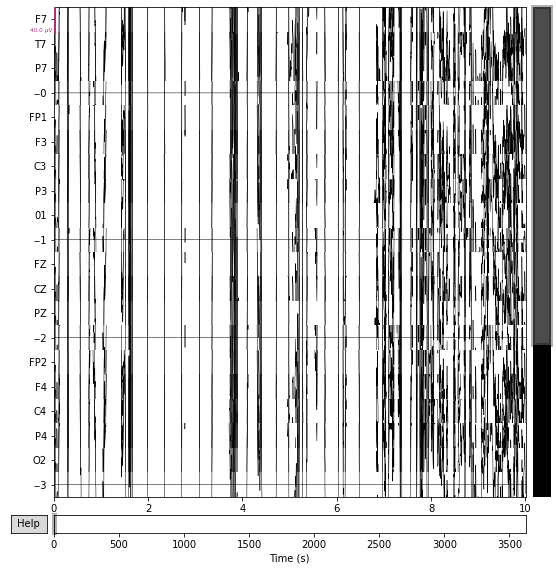

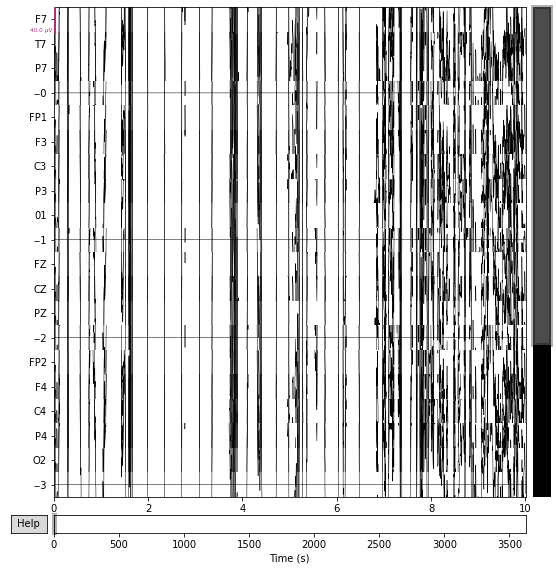

In [ ]:
print("sezure")
raw_sezure.plot()

sezure free


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


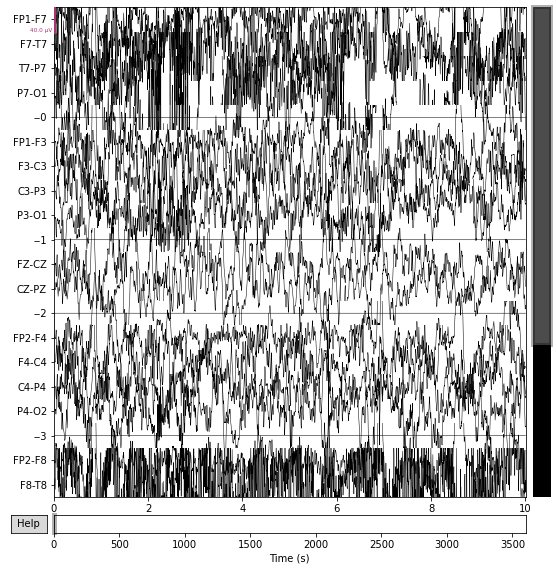

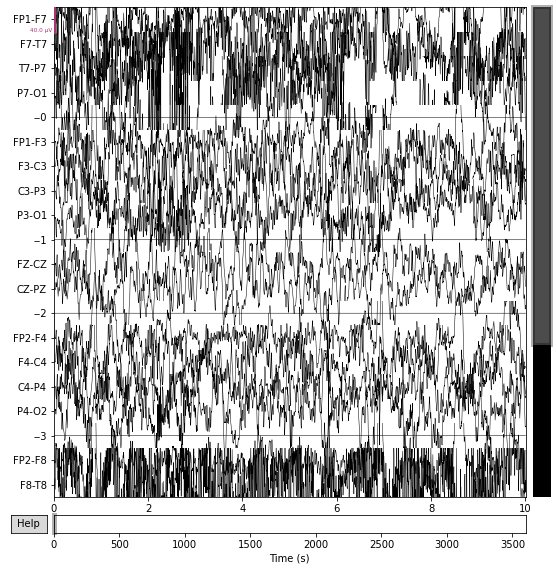

In [ ]:
print("sezure free")
raw_sezure_free.plot()

In [ ]:
seizure_free_record_df = readEdfFile(pathToFile='/content/drive/My Drive/dsp_dataset/chb12_32.edf')
seizure_record_df = readEdfFile(pathToFile='/content/drive/My Drive/dsp_dataset/chb12_29.edf')

In [ ]:
# add index column
seizure_free_record_df['index'] = range(1, len(seizure_free_record_df) + 1)
seizure_record_df['index'] = range(1, len(seizure_record_df) + 1)

### Showing some samples from the dataframe to take a look within the time domain:

In [ ]:
seizure_record_df.head(5)

F7          T7          P7    -         FP1          F3  \
0 -810.158730 -837.118437 -827.741148  0.0 -775.775336 -749.987790   
1    0.195360    0.195360    0.195360  0.0    0.195360    0.195360   
2    0.586081    0.586081    0.586081  0.0    0.586081    0.586081   
3    2.539683    2.539683    2.148962  0.0    2.539683    2.148962   
4   -2.148962   -2.148962   -1.758242  0.0   -2.148962   -1.758242   

           C3          P3          01    -  ...          T8          P8  \
0 -769.133089 -832.039072 -827.741148  0.0  ... -807.814408 -833.601954   
1    0.195360    0.195360    0.195360  0.0  ...    0.195360    0.195360   
2    0.586081    0.586081    0.586081  0.0  ...    0.586081    0.586081   
3    2.148962    2.148962    2.148962  0.0  ...    2.539683    2.539683   
4   -1.758242   -1.758242   -1.758242  0.0  ...   -1.758242   -1.758242   

    EKG1-CHIN          C2          C6         CP2         CP4         CP6  \
0 -718.730159 -718.730159 -767.179487 -784.371184 -594.871795 -797.655678   
1    0.195360    0.195360    0.195360    0.195360    0.195360    0.195360   
2    0.195360    0.586081    0.586081    0.586081    0.586081    0.586081   
3    0.195360    2.148962    2.539683    2.539683    3.321123    2.539683   
4    0.195360   -1.758242   -2.148962   -1.758242   -0.586081   -2.148962   

   seizure  index  
0      0.0      1  
1      0.0      2  
2      0.0      3  
3      0.0      4  
4      0.0      5  

[5 rows x 31 columns]

In [ ]:
''''File Name: chb12_29.edf
File Start Time: 18:07:19
File End Time: 19:07:43
Number of Seizures in File: 6
Seizure 1 Start Time: 107 seconds
Seizure 1 End Time:  146 seconds
Seizure 2 Start Time: 554 seconds
Seizure 2 End Time:  592 seconds
Seizure 3 Start Time: 1163 seconds
Seizure 3 End Time:  1199 seconds
Seizure 4 Start Time: 1401 seconds
Seizure 4 End Time:  1447 seconds
Seizure 5 Start Time:  1884 seconds
Seizure 5 End Time: 1921 seconds
Seizure 6 Start Time: 3557 seconds
Seizure 6 End Time: 3584 seconds'''

"'File Name: chb12_29.edf\nFile Start Time: 18:07:19\nFile End Time: 19:07:43\nNumber of Seizures in File: 6\nSeizure 1 Start Time: 107 seconds\nSeizure 1 End Time:  146 seconds\nSeizure 2 Start Time: 554 seconds\nSeizure 2 End Time:  592 seconds\nSeizure 3 Start Time: 1163 seconds\nSeizure 3 End Time:  1199 seconds\nSeizure 4 Start Time: 1401 seconds\nSeizure 4 End Time:  1447 seconds\nSeizure 5 Start Time:  1884 seconds\nSeizure 5 End Time: 1921 seconds\nSeizure 6 Start Time: 3557 seconds\nSeizure 6 End Time: 3584 seconds"

##### the intervals of the ictal samples:

In [ ]:
Seizure_1_interval= pd.DataFrame(seizure_record_df.loc[28355: 38691])
Seizure_2_interval= pd.DataFrame(seizure_record_df.loc[141824: 151553])
Seizure_3_interval= pd.DataFrame(seizure_record_df.loc[297728: 306945])
Seizure_4_interval= pd.DataFrame(seizure_record_df.loc[358656: 470433])
Seizure_5_interval= pd.DataFrame(seizure_record_df.loc[482304: 491777])
Seizure_6_interval= pd.DataFrame(seizure_record_df.loc[910592: 917505])


### collecting of all ictal intervals within only one dataframe:

In [ ]:
#extract seizure records
seizure_record_df = pd.concat([Seizure_1_interval, Seizure_2_interval, Seizure_3_interval, Seizure_4_interval, Seizure_5_interval, Seizure_6_interval])

In [ ]:
seizure_record_df.sample(10)

F7          T7          P7    -         FP1          F3  \
384235   60.366300  117.802198   90.451770  0.0   88.498168   34.578755   
405196  214.700855  173.284493  192.039072  0.0  198.290598  179.926740   
369012   49.035409   73.260073   66.617827  0.0   56.459096  128.351648   
487292  256.898657  150.231990   84.200244  0.0  354.969475  180.708181   
382021 -904.713065 -871.501832 -803.516484  0.0 -907.448107 -914.481074   
445893   13.089133   43.956044   52.551893  0.0  -45.909646   33.797314   
383115   38.876679   23.247863   41.611722  0.0   49.426129   30.280830   
449679  127.960928  112.332112  105.689866  0.0  145.934066  151.013431   
424300 -123.272283 -113.504274 -115.067155  0.0  -88.888889 -105.689866   
463751  -10.744811    0.976801   22.075702  0.0  -21.684982  -39.267399   

                C3          P3          01    -  ...          T8          P8  \
384235   22.857143    4.493284   74.822955  0.0  ...   34.188034   83.809524   
405196  156.092796  166.251526  170.158730  0.0  ...  204.932845  197.509158   
369012  112.332112  119.365079  125.616606  0.0  ... -143.980464  171.721612   
487292  163.907204  163.907204  116.630037  0.0  ...  183.833944  176.410256   
382021 -855.482295 -808.205128 -825.396825  0.0  ... -848.840049 -879.706960   
445893    9.572650   30.671551   11.526252  0.0  ...   29.499389   83.028083   
383115   17.777778   77.948718   74.041514  0.0  ...   33.015873   49.816850   
449679  123.663004   77.948718   68.571429  0.0  ...  142.026862   97.094017   
424300 -118.192918  -86.935287 -114.285714  0.0  ...  -25.201465  -90.061050   
463751   -4.102564   11.135531   54.505495  0.0  ...   -0.195360   25.592186   

         EKG1-CHIN          C2          C6         CP2         CP4  \
384235  -15.824176  -32.625153   51.379731  -55.286935  -88.498168   
405196  282.686203  150.231990  252.600733  169.377289  174.847375   
369012  176.019536  212.356532  211.184371  235.799756  232.283272   
487292  164.297924  181.098901  242.832723  198.681319  227.594628   
382021 -842.588523 -863.296703 -860.952381 -861.733822 -826.568987   
445893    9.572650   16.214896   14.261294   12.307692  -39.267399   
383115   70.134310   22.075702   20.903541   45.518926   20.512821   
449679  117.802198  154.139194  168.205128  123.272283  101.001221   
424300  -93.968254 -100.219780  -61.538462  -89.670330  -77.948718   
463751  -52.551893  -37.704518   -9.572650  -21.294261   -7.228327   

               CP6  seizure   index  
384235  -17.777778      0.0  384236  
405196  233.455433      0.0  405197  
369012  245.567766      0.0  369013  
487292  220.561661      0.0  487293  
382021 -880.879121      0.0  382022  
445893   42.783883      0.0  445894  
383115   27.155067      0.0  383116  
449679  158.437118      0.0  449680  
424300  -68.571429      0.0  424301  
463751    0.976801      0.0  463752  

[10 rows x 31 columns]

### Notch filter is working as a bandpass filter to remove the frequency component at 60 Hz for a signal that is sampled with fs = 256
### it retruns the filter parameters and plot its response:

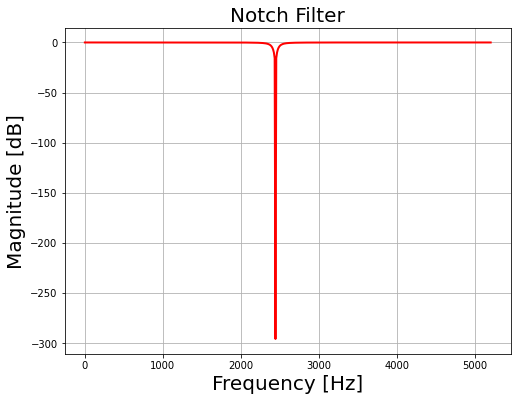

In [ ]:
# desing notch filter
samp_freq = 256  # Sample frequency (Hz)
notch_freq = 60.0  # Frequency to be removed from signal (Hz)
quality_factor = 20.0  # Quality factor
 
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
 
# Compute frequency response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
 
fig = plt.figure(figsize=(8, 6))
 
# Plot magnitude response of the filter
plt.plot(freq*samp_freq/(2*np.pi), 20 * np.log10(abs(h)),
         'r', label='Bandpass filter', linewidth='2')
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Magnitude [dB]', fontsize=20)
plt.title('Notch Filter', fontsize=20)
plt.grid()

## Filter signal takes selected channels and takes the dataframe of the records and the filter parameter b, a:

## it applies the notch filter on the signal to remove the 60 Hz band frequency and then it plots the filtered signal.

In [ ]:
def filter_signal(b_notch,a_notch, selected_chanels, patent_record):
    # Apply notch filter to the noisy signal using signal.filtfilt
    filterd_signals = pd.DataFrame()
    n = np.linspace(0, 25, 6400) # Generate 256 sample sequence in 1 sec as the fs is 256
    for chanel in selected_chanels:
        outputSignal = signal.filtfilt(b_notch, a_notch, patent_record[chanel] )
        filterd_signals[chanel] = outputSignal
        plt.plot(n, outputSignal[0:6400])
        plt.xlabel('Time', fontsize=20)
        plt.ylabel('Magnitude', fontsize=18)
        plt.title(f'Filtered Signal of chanel {chanel}', fontsize=20)
        plt.subplots_adjust(hspace=0.5)
        fig.tight_layout()
        plt.show()

    return filterd_signals



In [ ]:
seizure_free_record_df.columns

Index(['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', '-', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', '-', 'FZ-CZ', 'CZ-PZ', '-', 'FP2-F4', 'F4-C4', 'C4-P4',
       'P4-O2', '-', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', '-', 'P7-T7',
       'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8', 'LOC-ROC', 'seizure',
       'index'],
      dtype='object')

## This cell is for the user to edit it if he want to choose different channels to work with: 

In [ ]:
selected_chanels_free=['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FZ-CZ', 'CZ-PZ', 'FP2-F4', 'F4-C4', 'C4-P4',
       'P4-O2', 'FP2-F8', 'F8-T8', 'P7-T7',
       'T7-FT9', 'FT9-FT10', 'FT10-T8']
       
seizure_selected_chanels= ['F7', 'T7', 'P7', 'FP1', 'F3', 'C3', 'P3', '01', 'FZ', 'CZ',
       'PZ', 'FP2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T8', 'P8',
       'EKG1-CHIN', 'C2', 'C6', 'CP2', 'CP4', 'CP6']

## We need to find the average of the selected channels to work with it as a new feature that represents the performance of the selected channels:

In [ ]:
seizure_free_record_df['avgsignal']= seizure_free_record_df[selected_chanels_free].mean(axis=1)
seizure_record_df['avgsignal']= seizure_record_df[seizure_selected_chanels].mean(axis=1)


### Filtering the seizure free records:

##### Without averaging, it works on the selected channels:

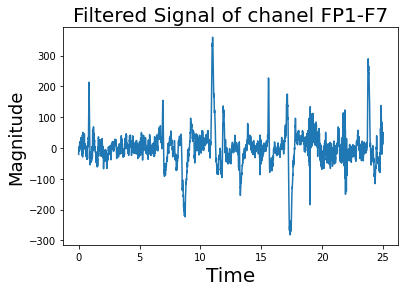

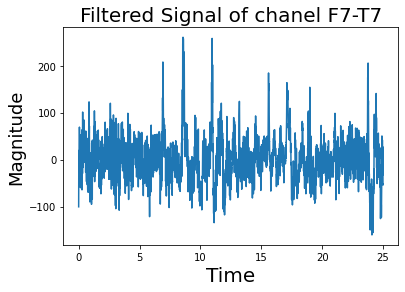

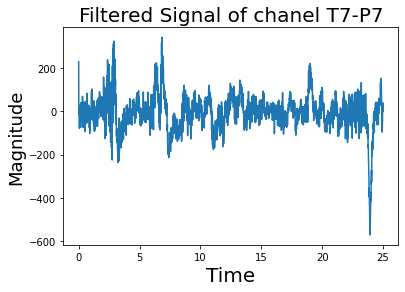

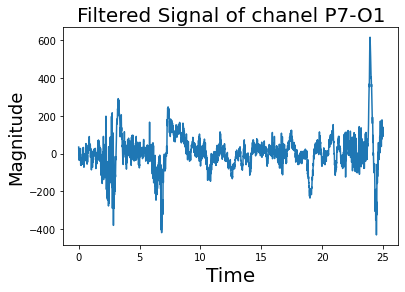

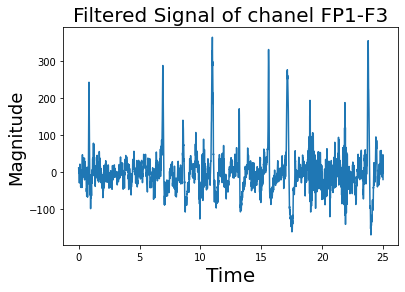

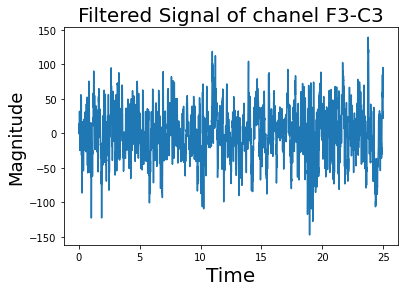

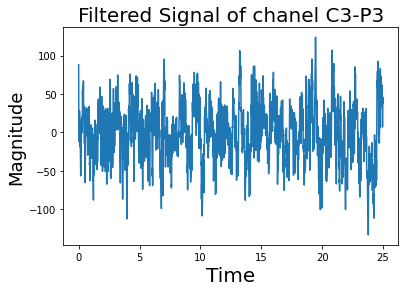

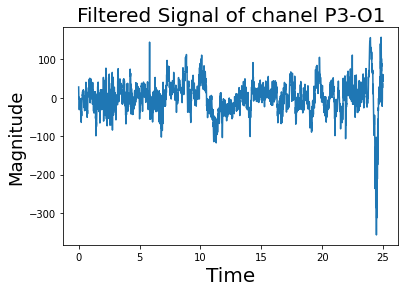

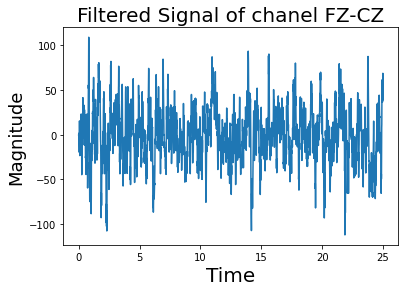

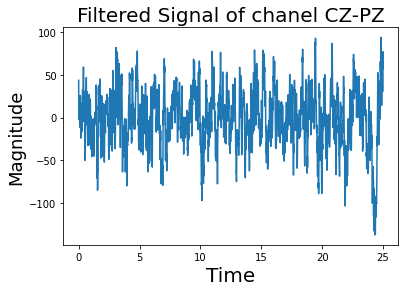

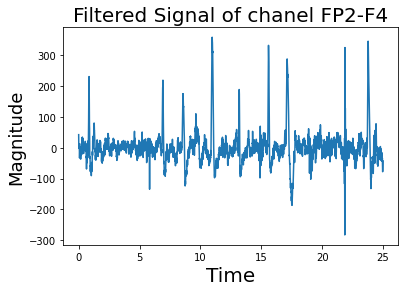

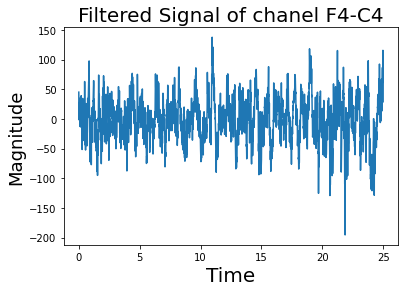

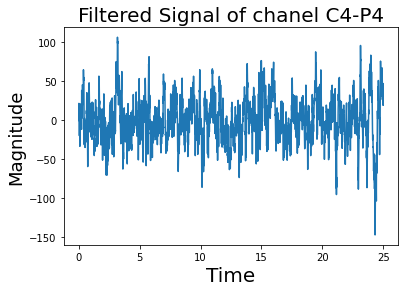

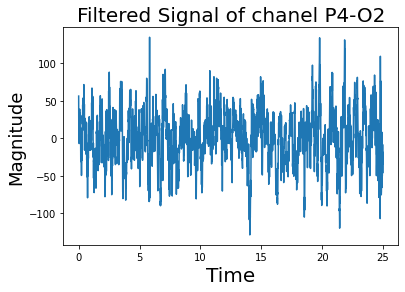

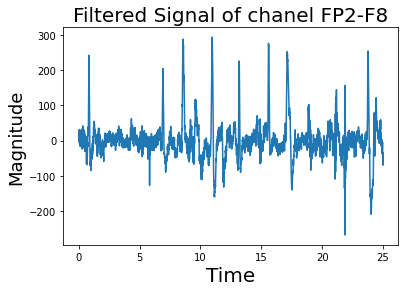

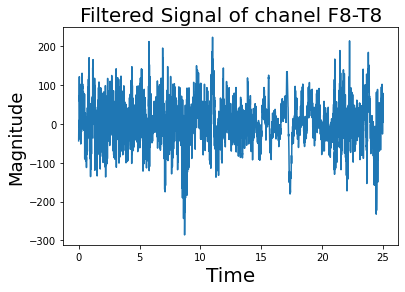

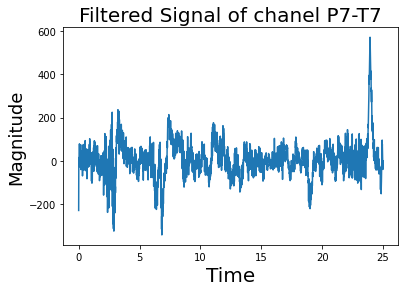

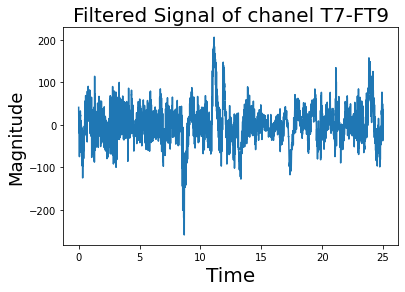

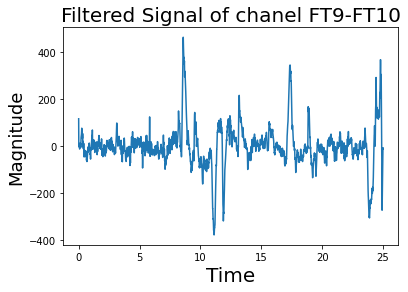

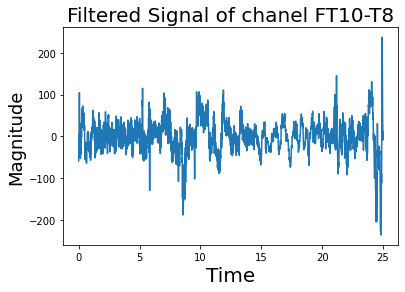

In [ ]:

filter_seizure_free_record_df = filter_signal(b_notch, a_notch, selected_chanels_free, seizure_free_record_df)


In [ ]:
seizure_record_df.columns

Index(['F7', 'T7', 'P7', '-', 'FP1', 'F3', 'C3', 'P3', '01', '-', 'FZ', 'CZ',
       'PZ', '-', 'FP2', 'F4', 'C4', 'P4', 'O2', '-', 'F8', 'T8', 'P8',
       'EKG1-CHIN', 'C2', 'C6', 'CP2', 'CP4', 'CP6', 'seizure', 'index',
       'avgsignal'],
      dtype='object')

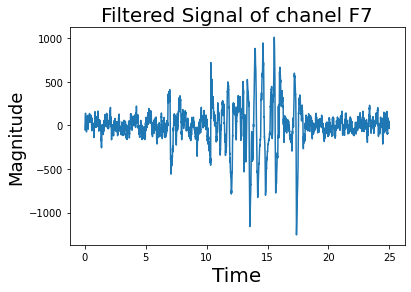

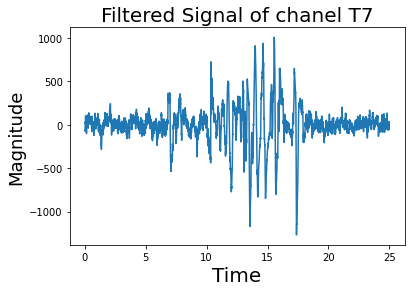

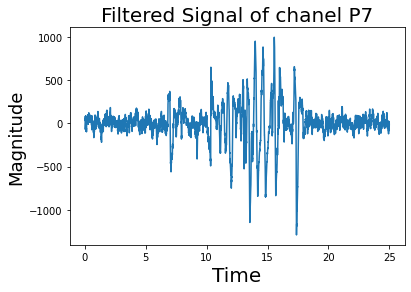

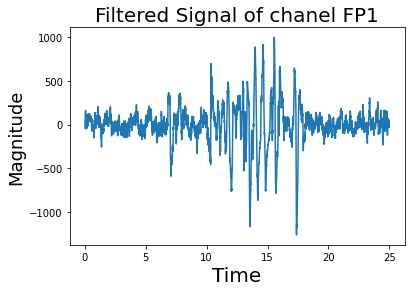

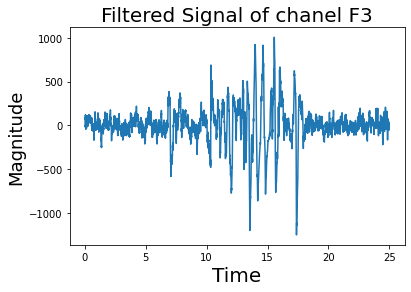

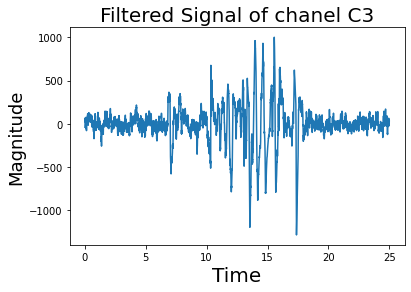

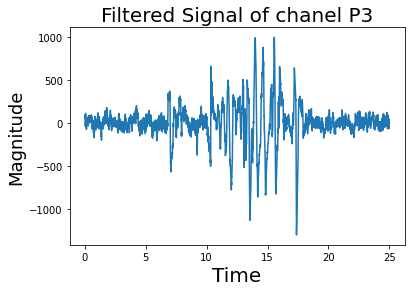

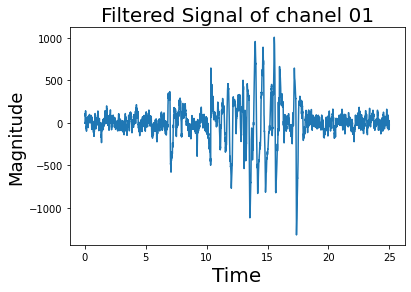

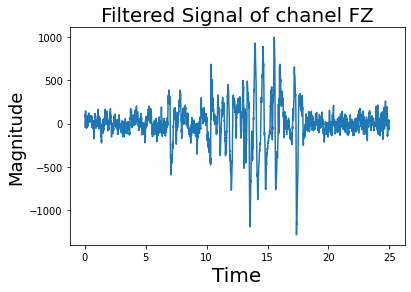

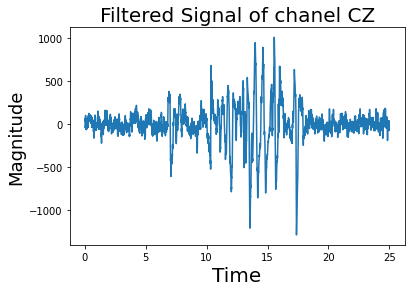

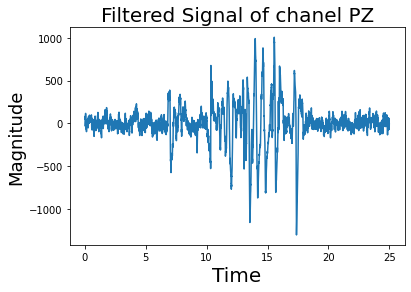

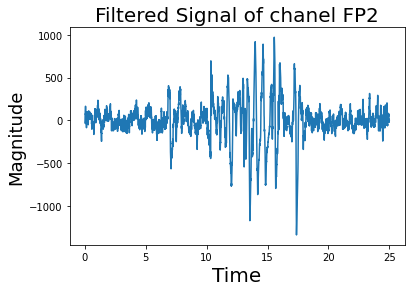

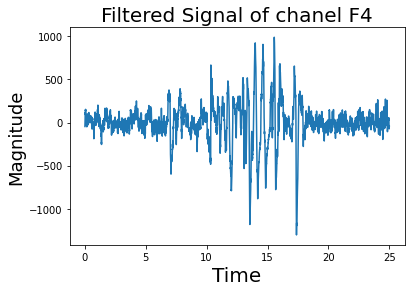

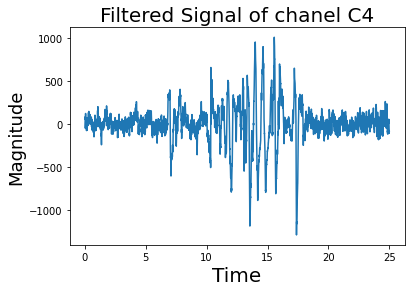

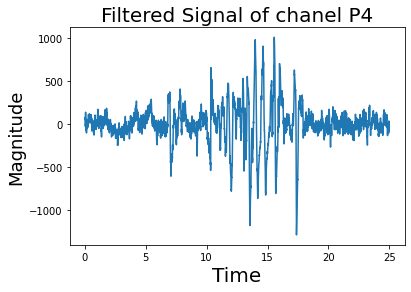

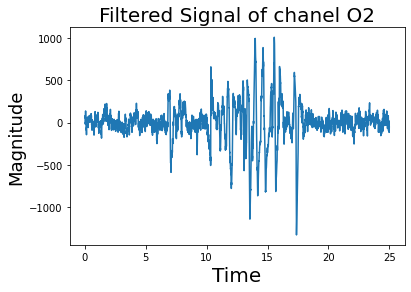

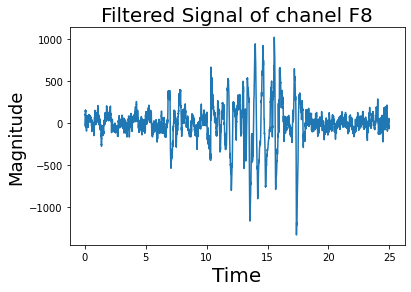

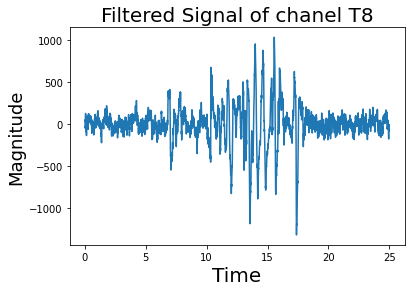

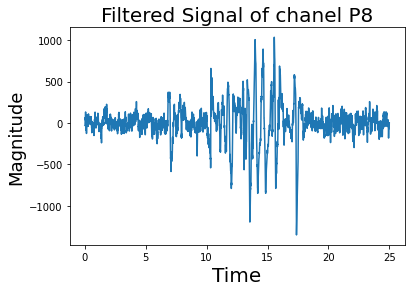

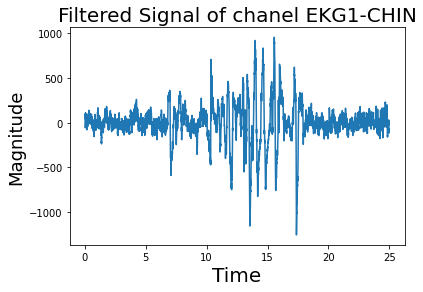

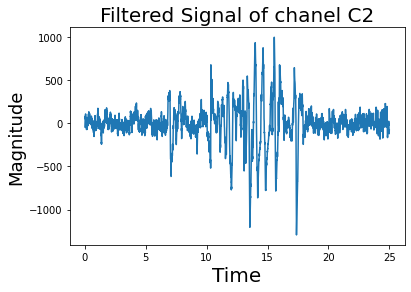

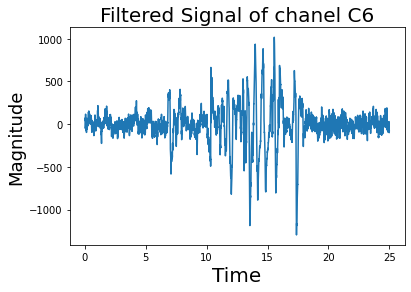

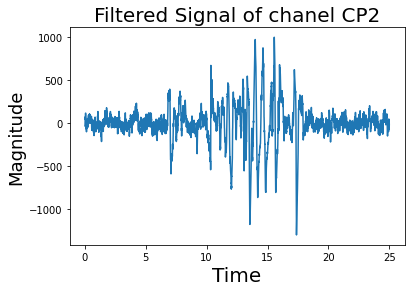

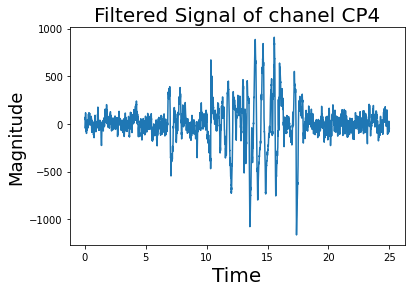

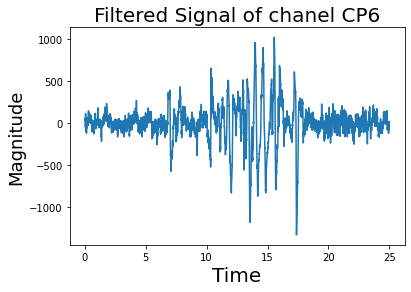

In [ ]:
filterd_seizure_record_df = filter_signal(b_notch, a_notch, seizure_selected_chanels, seizure_record_df)

### working on the average new channel that represents the selected channels:

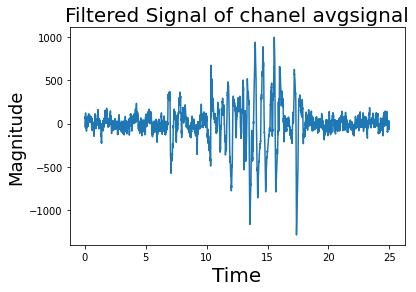

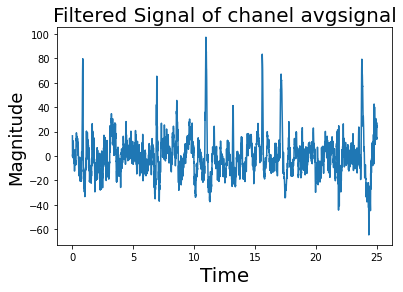

In [ ]:
filter_seizure_record_df = filter_signal(b_notch, a_notch, ['avgsignal'], seizure_record_df)
filter_seizure_free_record_df = filter_signal(b_notch, a_notch, ['avgsignal'], seizure_free_record_df)

### We notice that within the seizure samples a sudden change in the samples
### on the other hand, with free seizure has the same pattern over the whole time interval

In [ ]:
from scipy import signal

In [ ]:
import numpy as np

In [ ]:
import matplotlib.colors as colors

### calcSTFT evaluate the STFT of each signal with input parameters 
### such as, the signal itself, fs, the window type, the window length, the number of points to overlap:

In [ ]:
def calcSTFT(inputSignal, samplingFreq, window, nperseg=256, noverlap = None, figsize=(19,6), cmap='magma', ylim_max=135, output=False):
    '''Calculates the STFT for a time series:
        inputSignal: numpy array for the signal (it also works for Pandas.Series);
        samplingFreq: the sampling frequency;
        window : str or tuple or array_like, optional
            Desired window to use. If `window` is a string or tuple, it is
            passed to `get_window` to generate the window values, which are
            DFT-even by default. See `get_window` for a list of windows and
            required parameters. If `window` is array_like it will be used
            directly as the window and its length must be nperseg. Defaults
            to a Hann window.
        nperseg : int, optional
            Length of each segment. Defaults to 256.
        figsize: the plot size, set as (6,3) by default;
        cmap: the color map, set as the divergence Red-Yellow-Green by default;
        ylim_max: the max frequency to be shown. By default it's the half sampling frequency;
        output: 'False', as default. If 'True', returns the STFT values.
         
        Outputs (if TRUE):
            f: the frequency values
            t: the time values
            Zxx: the STFT values"'''
    ##Calculating STFT
    f, t, Zxx = signal.stft(inputSignal, samplingFreq, window=window, nperseg=nperseg, noverlap = noverlap)
    ##Plotting STFT
    fig = plt.figure(figsize=figsize)
    ## added to change the color : norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
    spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
                          
                          cmap=plt.get_cmap(cmap))
    cbar = plt.colorbar(spec)
    ##Plot adjustments
    plt.title('STFT Spectrogram')
    ax = fig.axes[0]
    ax.grid(True)
    ax.set_title('STFT Magnitude')
    if ylim_max:
        ax.set_ylim(0,ylim_max)
     # added    
    ax.set_xlim(0, 60)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.show
    if output:
        return f,t,Zxx
    else:
        return

In [ ]:
#fs = 256;
#for i in range(len(filterd_seizure_record_df)):
#  calcSTFT(filterd_seizure_record_df.iloc[i], fs) 

In [ ]:
len(filterd_seizure_record_df)


157451

# Changing the window parameter:

### 1- Different window size

### we let the type fixed here with differnt window size and for the upcoming cells, we will use different window types but with different window sizes
#### note that different window types is over 5 cells

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


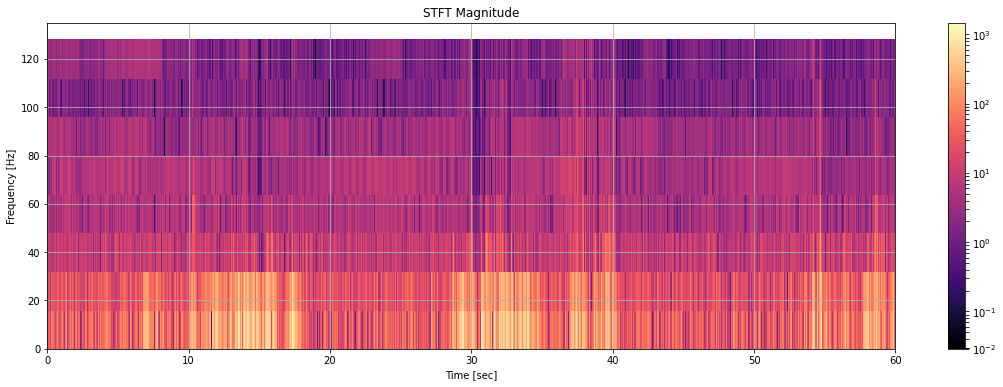

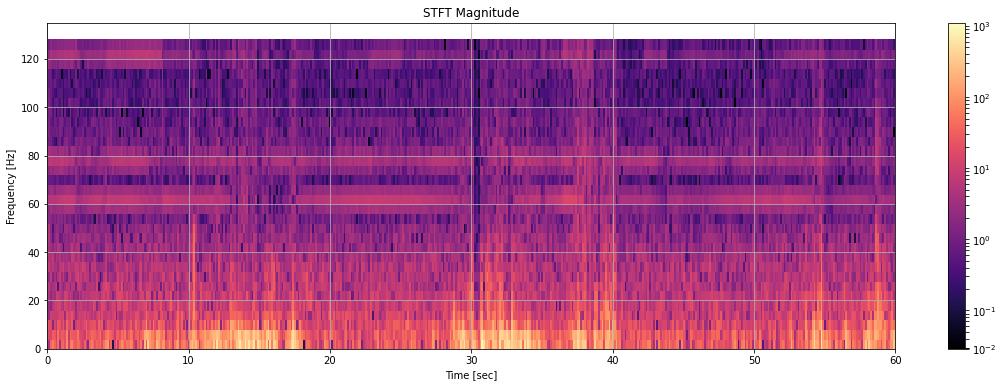

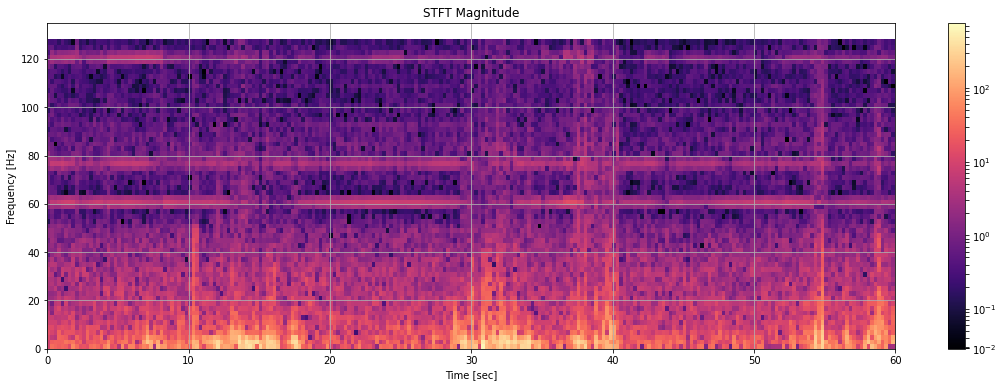

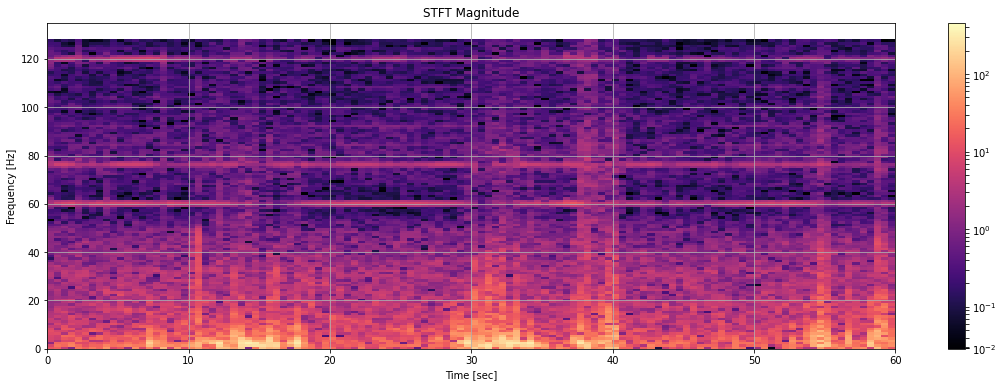

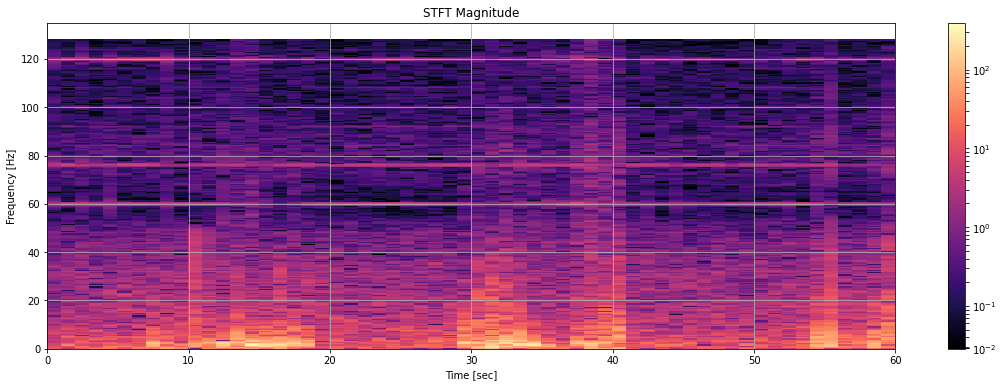

In [ ]:
fs = 256;
numerOfSegmentLengthOfWindow = 256
numberOfoverlap  =10
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 16) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 64) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 128) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 256) 
#blackman, #boxcar
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 512) 

### 2- Changing the window type parameter:

#### window of balckman:

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


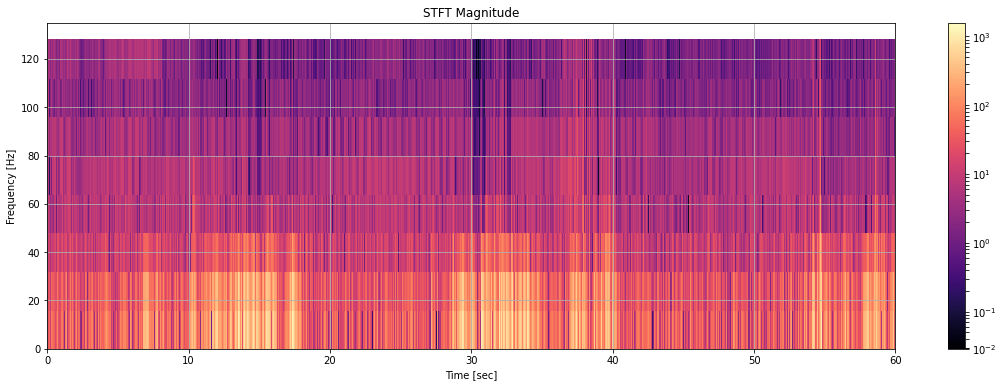

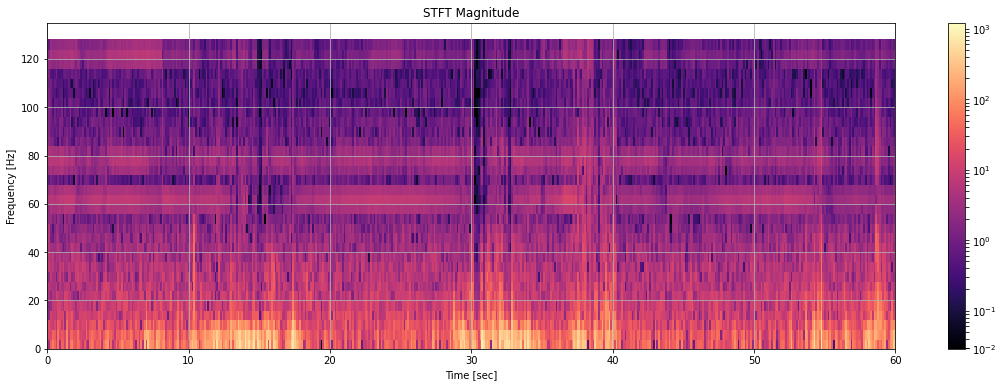

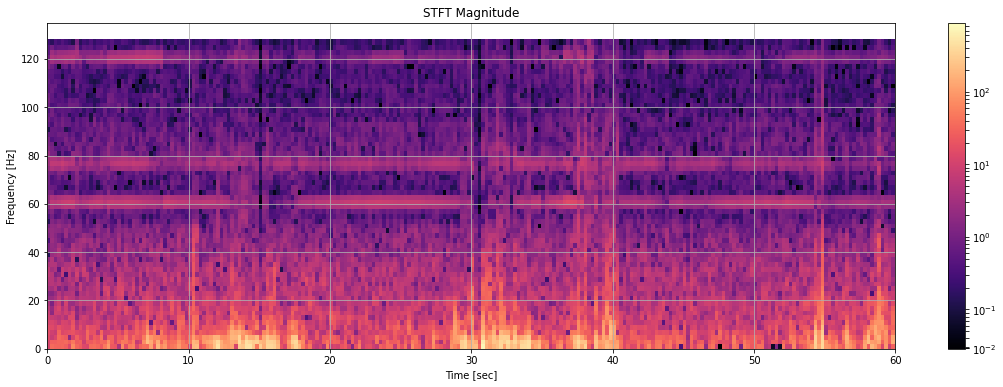

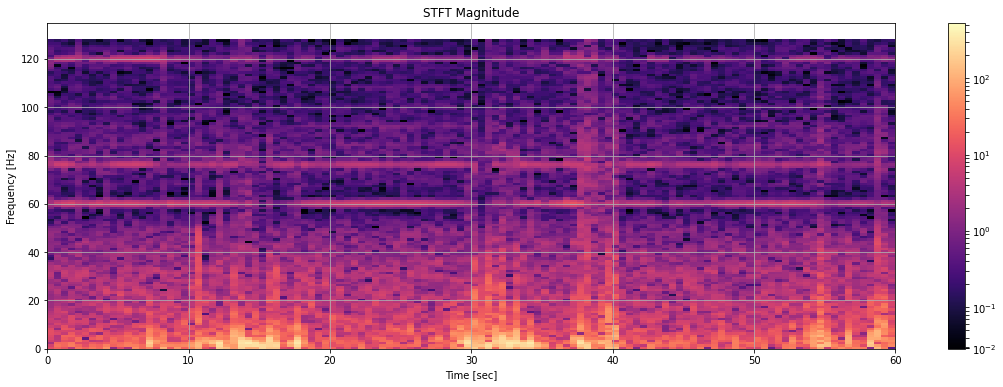

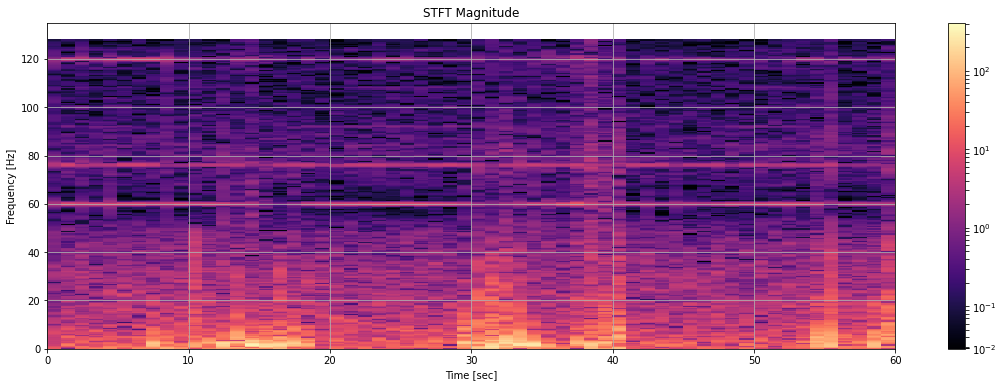

In [ ]:
fs = 256;
numerOfSegmentLengthOfWindow = 256
numberOfoverlap  =10
calcSTFT(seizure_record_df['avgsignal'], fs, 'blackman', 16) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'blackman', 64) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'blackman', 128) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'blackman', 256) 
#blackman, #boxcar
calcSTFT(seizure_record_df['avgsignal'], fs, 'blackman', 512) 

### ----------------------------------------

#### window of boxcar:

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


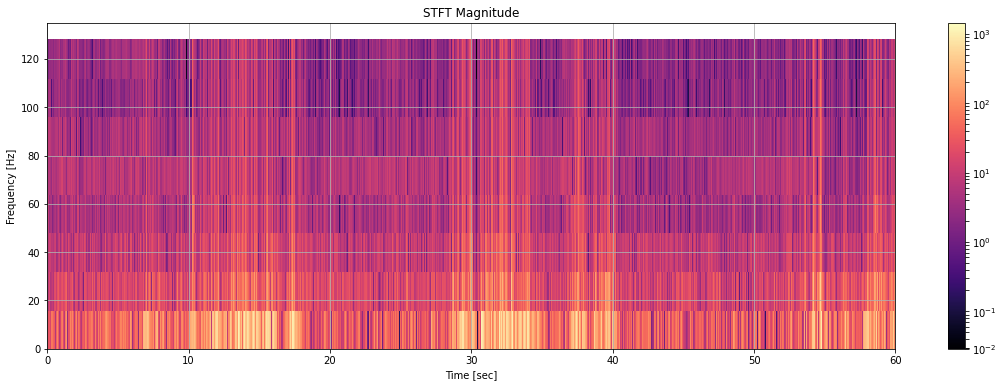

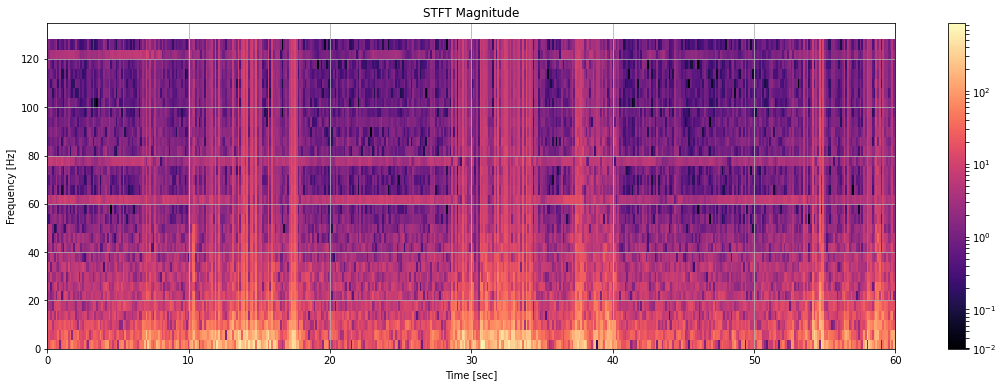

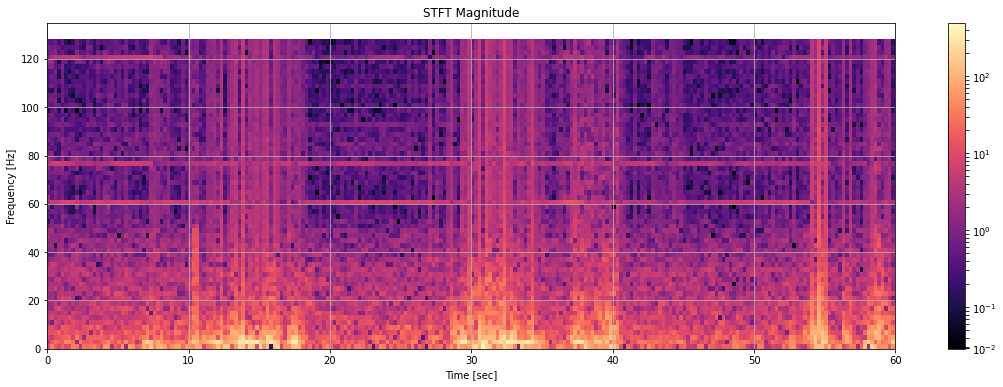

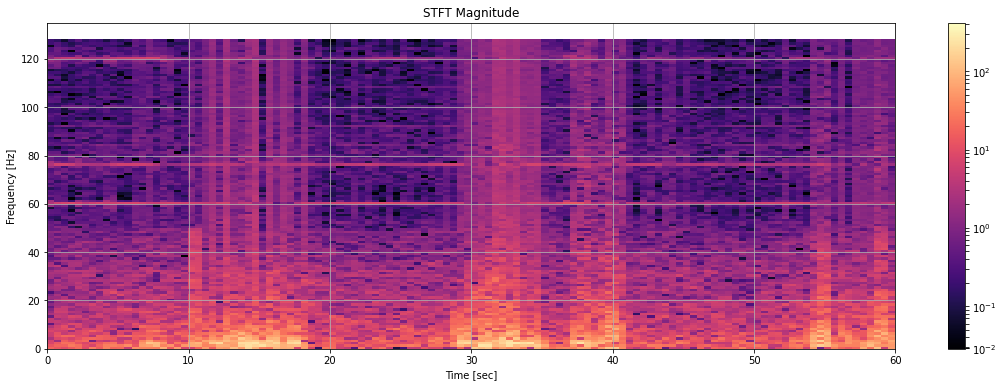

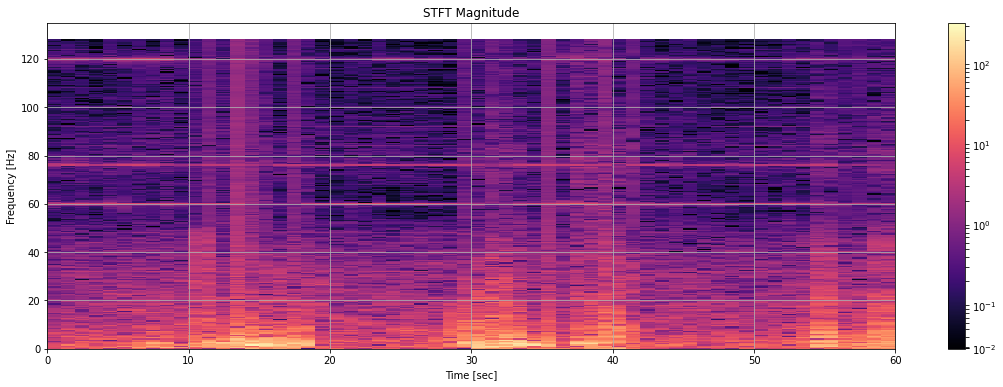

In [ ]:
fs = 256;
numerOfSegmentLengthOfWindow = 256
numberOfoverlap  =10
calcSTFT(seizure_record_df['avgsignal'], fs, 'boxcar', 16) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'boxcar', 64) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'boxcar', 128) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'boxcar', 256) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'boxcar', 512) 

### window of triang:

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


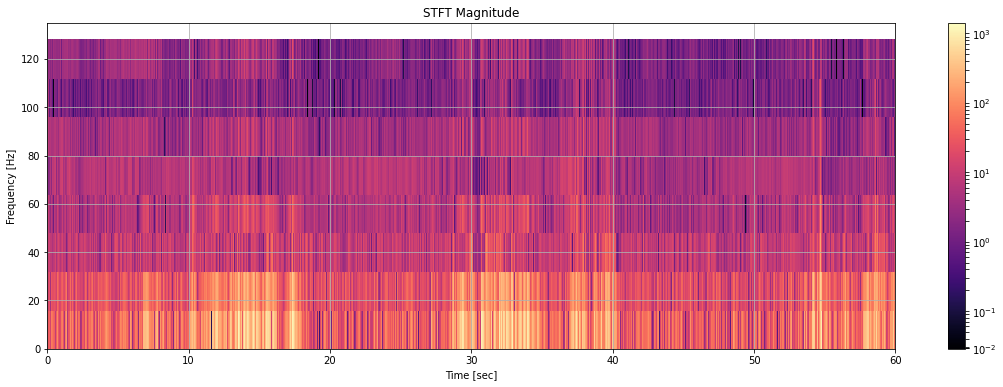

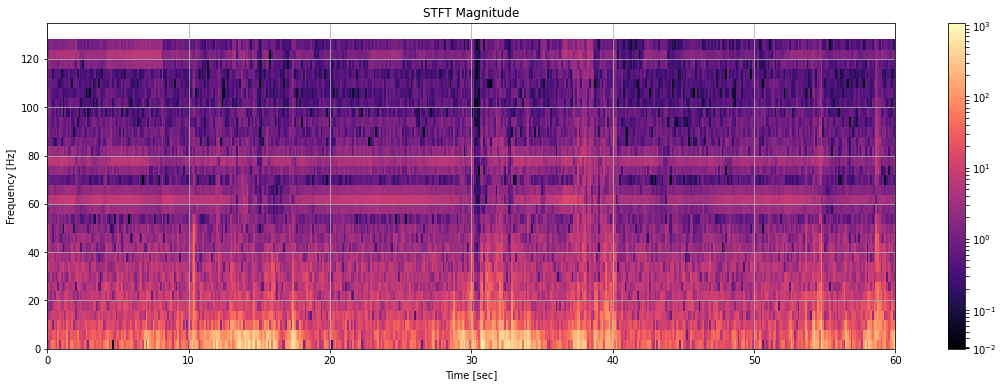

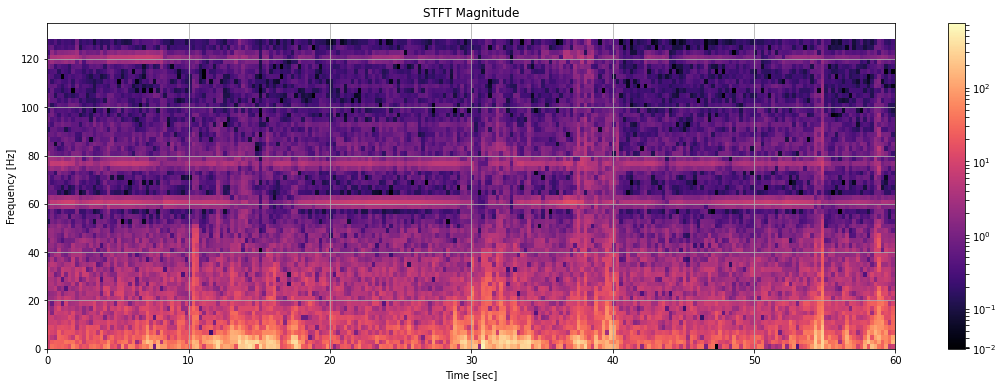

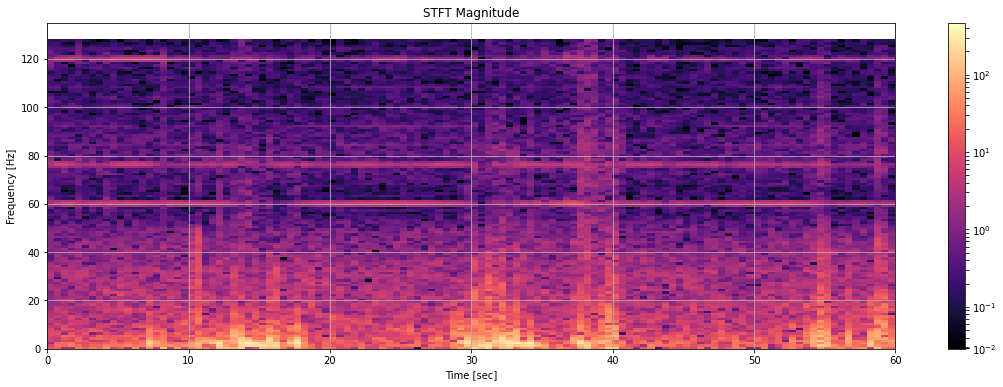

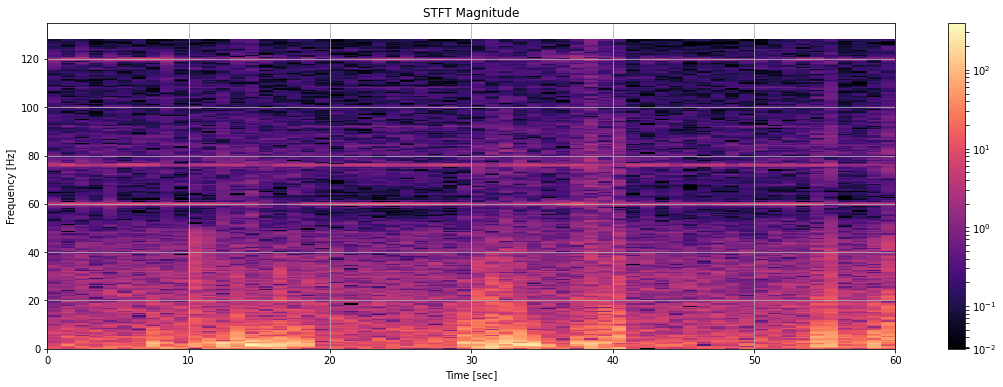

In [ ]:
fs = 256;
#numerOfSegmentLengthOfWindow = 256
#numberOfoverlap  =10
calcSTFT(seizure_record_df['avgsignal'], fs, 'triang', 16) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'triang', 64) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'triang', 128) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'triang', 256) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'triang', 512) 

# =======================================================

## till now, we have performed different window sizes with different window types. We have noticed a trade off of using a window size over another size and different window types which each one has a specific target we use it when we need to achieve.

# Window Size:
### We have noticed that for larger window sizes, we get high frequency resolution but a bad Time resolution and more DFT points 
### for smaller window sizes, we get a bad Frequency resolution and a high Time resolution with fewer DFT points
### =================================================
# Window Type:
### for the dataset we are working on, islolted frequencies that are far from each other, but there were noises around the main signals
## We have noticed that the most suitable window for that task is the Hamming window which has a wider main component to clearify the main siganls and very small side components that help us to ignore the noises effect

# Changing Overlapping number of points parameter:

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


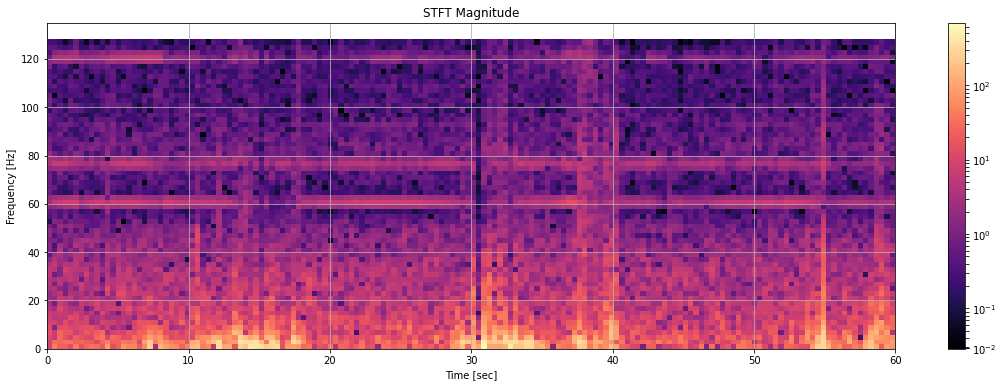

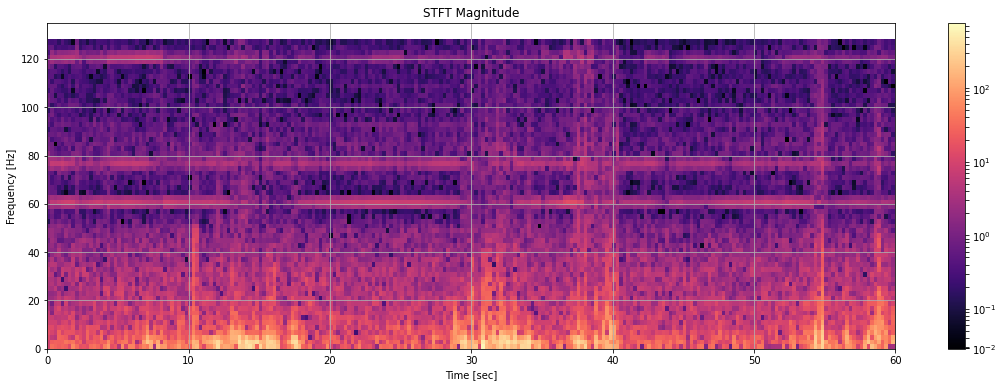

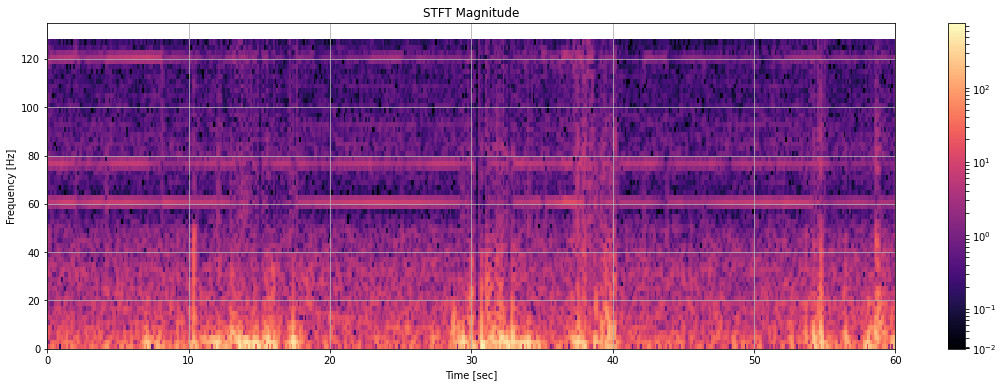

In [ ]:
fs = 256;
numerOfSegmentLengthOfWindow = 256
numberOfoverlap  =10
 
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 128, 32) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 128, 64) 
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 128, 96) 

## Usiong different overlapping samples according to the length the window or or the number of points in each segment


##We have noticed that for samller overlapping ratios, we get high frequency resolution but a bad Time resolution 

##for larger overlapping ratios, we get a bad Frequency resolution and a high Time resolution 

# =========================================

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


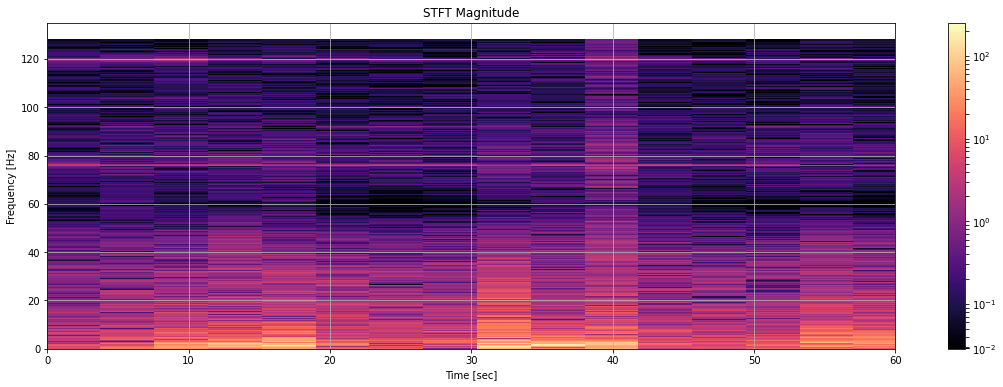

In [ ]:
#dffff.head()
# filter_seizure_record_df, filter_seizure_free_record_df
calcSTFT(filter_seizure_record_df['avgsignal'], fs, 'hamming', 1024, 50) 

## For the filtered Seizure cases, we can notice the existing of the frequency component in the specto. graph at different frequencies in addition to the 60 Hz band component.

In [ ]:
filterd_seizure_record_df.columns

Index(['F7', 'T7', 'P7', 'FP1', 'F3', 'C3', 'P3', '01', 'FZ', 'CZ', 'PZ',
       'FP2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T8', 'P8', 'EKG1-CHIN', 'C2',
       'C6', 'CP2', 'CP4', 'CP6'],
      dtype='object')

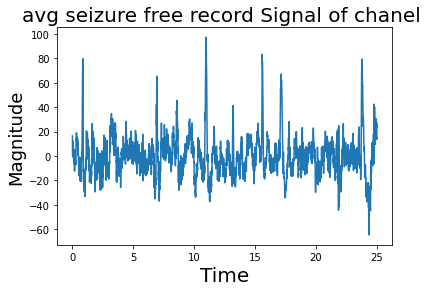

In [ ]:
#dffff = filter_signal(b_notch, a_notch,['avgsignal'], seizure_free_record_df)
#outputSignal = signal.filtfilt(b_notch, a_notch, patent_record[chanel] )
n = np.linspace(0, 25, 6400)
#23.4
plt.plot(n, seizure_free_record_df['avgsignal'][0:6400])
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title(f'avg seizure free record Signal of chanel ', fontsize=20)
plt.subplots_adjust()
fig.tight_layout()
plt.show()

## for the filtered free, there is no 60 Hz band component 
## there is no band larger than 100

## free filtered:

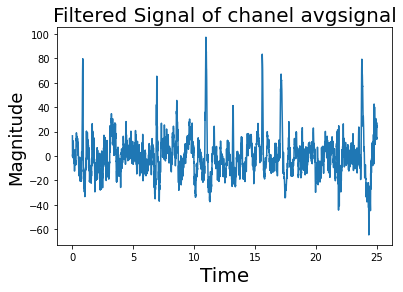

In [ ]:
filterd_free_seizure_record_df_avg = filter_signal(b_notch, a_notch, ['avgsignal'], seizure_free_record_df)

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


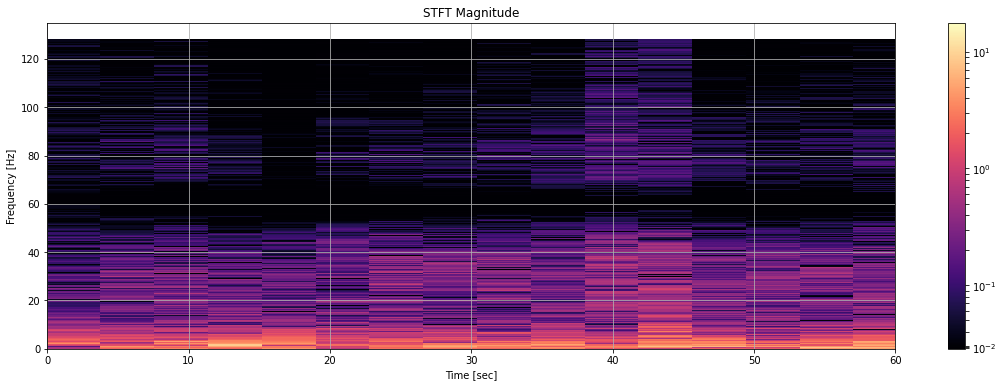

In [ ]:
calcSTFT(filterd_free_seizure_record_df_avg['avgsignal'], fs, 'hamming', 1024, 50)

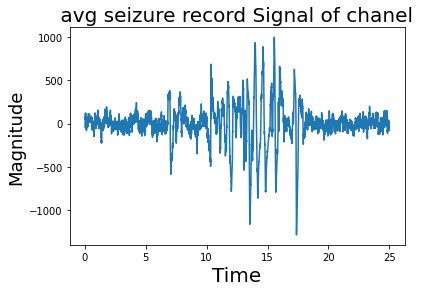

In [ ]:
n = np.linspace(0, 25, 6400)
#23.4
plt.plot(n, seizure_record_df['avgsignal'][0:6400])
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title(f' avg seizure record Signal of chanel ', fontsize=20)
plt.subplots_adjust()
fig.tight_layout()
plt.show()

## the next specto. is for the avg seizure recods which contis differne frequency components in addition to the band 60 Hz one.

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


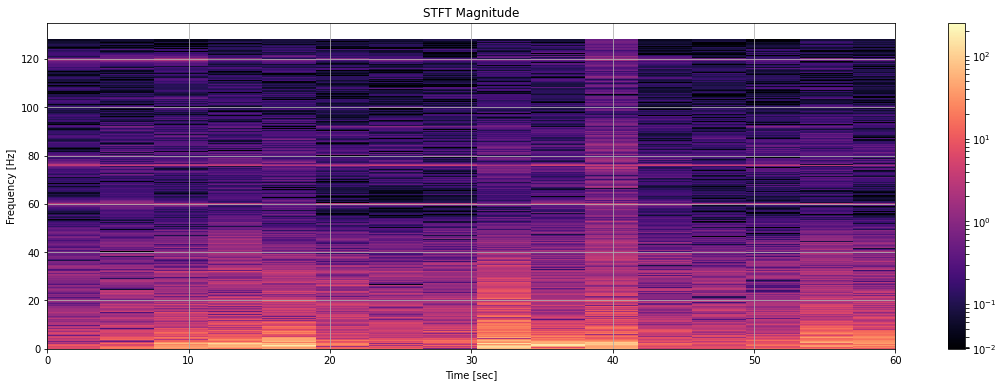

In [ ]:
calcSTFT(seizure_record_df['avgsignal'], fs, 'hamming', 1024, 50)

### the same signal but now it is filtered:

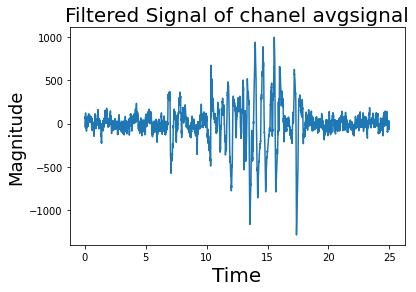

In [ ]:
filterd_seizure_record_df_avg = filter_signal(b_notch, a_notch, ['avgsignal'], seizure_record_df)

<ipython-input-251-5f0455f5a2a5>:28: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  spec = plt.pcolormesh(t, f, np.abs(Zxx),  norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),


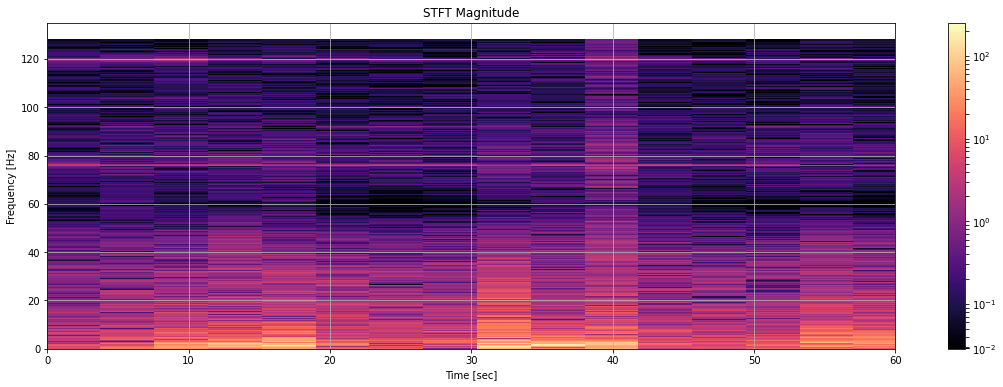

In [ ]:
calcSTFT(filterd_seizure_record_df_avg['avgsignal'], fs, 'hamming', 1024, 50)

## for the filtered Seizure records, it is clear that the filter removed the band 60 Hz component frequency from the frequencies coponents.